In [1]:
import scanpy as sc
import numpy as np
import pandas as pd

In [2]:
import os
os.chdir('./../')
from compert.helper import rank_genes_groups_by_cov

In [24]:
adata = sc.read(f'./datasets/kang_raw.h5ad')

In [25]:
sc.pp.normalize_per_cell(adata)

/home/mo/miniconda3/envs/pytorch/lib/python3.8/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


In [26]:
sc.pp.log1p(adata)
sc.pp.highly_variable_genes(adata, n_top_genes=5000, subset=True)

/home/mo/miniconda3/envs/pytorch/lib/python3.8/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


In [27]:
adata.obs['dose_val'] = 1.0
adata.obs['drug_dose_name'] = adata.obs.condition.astype(str) + '_' + adata.obs.dose_val.astype(str)
adata.obs['cov_drug_dose_name'] = adata.obs.seurat_annotations.astype(str) + '_' + adata.obs.drug_dose_name.astype(str)
adata.obs['control'] = [1 if x == 'control_1.0' else 0 for x in adata.obs.drug_dose_name.values]
adata.obs['cov_drug'] = adata.obs.seurat_annotations.astype(str) + '_' + adata.obs.condition.astype(str)

In [30]:
adata.obs['cell_type'] = adata.obs.seurat_annotations.copy()


In [31]:
from compert.helper import rank_genes_groups_by_cov
rank_genes_groups_by_cov(adata, groupby='cov_drug', covariate='cell_type', control_group='control')

/home/mo/miniconda3/envs/pytorch/lib/python3.8/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)
/home/mo/miniconda3/envs/pytorch/lib/python3.8/site-packages/anndata/_core/anndata.py:1207: ImplicitModificationWarning: Initializing view as actual.
  warnings.warn(
Trying to set attribute `.obs` of view, copying.
... storing 'drug_dose_name' as categorical
Trying to set attribute `.obs` of view, copying.
... storing 'cov_drug_dose_name' as categorical
Trying to set attribute `.obs` of view, copying.
... storing 'cov_drug' as categorical
/home/mo/miniconda3/envs/pytorch/lib/python3.8/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)
/home/mo

CD14 Mono
CD4 Memory T


/home/mo/miniconda3/envs/pytorch/lib/python3.8/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)
/home/mo/miniconda3/envs/pytorch/lib/python3.8/site-packages/anndata/_core/anndata.py:1207: ImplicitModificationWarning: Initializing view as actual.
  warnings.warn(
Trying to set attribute `.obs` of view, copying.
... storing 'drug_dose_name' as categorical
Trying to set attribute `.obs` of view, copying.
... storing 'cov_drug_dose_name' as categorical
Trying to set attribute `.obs` of view, copying.
... storing 'cov_drug' as categorical
/home/mo/miniconda3/envs/pytorch/lib/python3.8/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)
/home/mo

T activated
CD4 Naive T
CD8 T
B Activated


... storing 'drug_dose_name' as categorical
Trying to set attribute `.obs` of view, copying.
... storing 'cov_drug_dose_name' as categorical
Trying to set attribute `.obs` of view, copying.
... storing 'cov_drug' as categorical
/home/mo/miniconda3/envs/pytorch/lib/python3.8/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)
/home/mo/miniconda3/envs/pytorch/lib/python3.8/site-packages/anndata/_core/anndata.py:1207: ImplicitModificationWarning: Initializing view as actual.
  warnings.warn(
Trying to set attribute `.obs` of view, copying.
... storing 'drug_dose_name' as categorical
Trying to set attribute `.obs` of view, copying.
... storing 'cov_drug_dose_name' as categorical
Trying to set attribute `.obs` of view, copying.
... storing 'cov_drug' as categorical
/home/mo/miniconda3/envs/pytorch/lib/python3.8/site-pa

B
DC
CD16 Mono
NK


In [32]:
new_genes_dict = {}
for cat in adata.obs.cov_drug_dose_name.unique():
    if 'control' not in cat:
        rank_keys = np.array(list(adata.uns['rank_genes_groups_cov'].keys()))
        bool_idx = [x in cat for x in rank_keys]
        genes = adata.uns['rank_genes_groups_cov'][rank_keys[bool_idx][0]]
        new_genes_dict[cat] = genes

In [33]:
adata.uns['rank_genes_groups_cov'] = new_genes_dict

In [34]:
sc.pp.neighbors(adata)

         Falling back to preprocessing with `sc.pp.pca` and default params.


In [35]:
sc.tl.umap(adata)

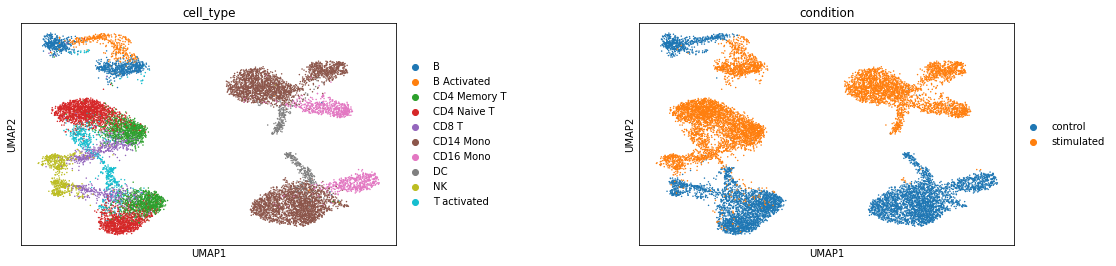

In [38]:
sc.pl.umap(adata, color=["cell_type","condition"], wspace=0.5)

In [40]:
adata.obs.cov_drug.value_counts()

CD14 Mono_control          2215
CD14 Mono_stimulated       2147
CD4 Naive T_stimulated     1526
CD4 Naive T_control         978
CD4 Memory T_stimulated     903
CD4 Memory T_control        859
B_stimulated                571
CD16 Mono_stimulated        537
CD16 Mono_control           507
CD8 T_stimulated            462
B_control                   407
CD8 T_control               352
T activated_stimulated      333
NK_stimulated               321
T activated_control         300
NK_control                  298
DC_control                  258
DC_stimulated               214
B Activated_stimulated      203
B Activated_control         185
Name: cov_drug, dtype: int64

# Split

In [47]:
adata.obs['split'] = 'train'  # reset
ho_cells = ["NK_stimulated"]
ood = adata.obs['cov_drug'].isin(ho_cells)

In [48]:
adata.obs['split'][ood & (adata.obs['dose_val'] == 1.0)] = 'ood'
test_idx = sc.pp.subsample(adata[adata.obs['split'] != 'ood'], .10, copy=True).obs.index
adata.obs['split'].loc[test_idx] = 'test'

<ipython-input-48-861cbc54850d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  adata.obs['split'][ood & (adata.obs['dose_val'] == 1.0)] = 'ood'
/home/mo/miniconda3/envs/pytorch/lib/python3.8/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)
/home/mo/miniconda3/envs/pytorch/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [49]:
pd.crosstab(adata.obs['split'], adata.obs['condition'])

condition,control,stimulated
split,,
ood,0,321
test,608,717
train,5751,6179


In [61]:
adata.obs['split'].value_counts()

train    11930
test      1325
ood        321
Name: split, dtype: int64

In [51]:
adata[adata.obs.split == 'ood'].obs.condition.value_counts()

/home/mo/miniconda3/envs/pytorch/lib/python3.8/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


stimulated    321
Name: condition, dtype: int64

In [52]:
adata[adata.obs.split == 'test'].obs.condition.value_counts()

stimulated    717
control       608
Name: condition, dtype: int64

In [56]:
from scipy.sparse import csr_matrix
adata.X = csr_matrix(adata.X)

In [57]:
sc.write('./datasets/kang_preprocessed.h5ad', adata)